#### Plot a stock portfolio using matplotlib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt

##### The portfolio will be composed by AAPL MELI BTC and TSLA stocks, teh amounts for each is 7, 12, 2, 5.

In [10]:
tickers = ['AAPL','MELI','FB','TSLA']
amounts = [7,6,2,5]
prices = []
total = []

In [11]:
for ticker in tickers :
    index = ticker.index(ticker)
    data = yf.download(ticker, start="2021-04-22", end="2021-04-24")
    price_close = data[-1:]['Close'][0]
    prices.append(price_close)
    total.append(price_close * amounts[index])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


##### Having all the data I can plot it

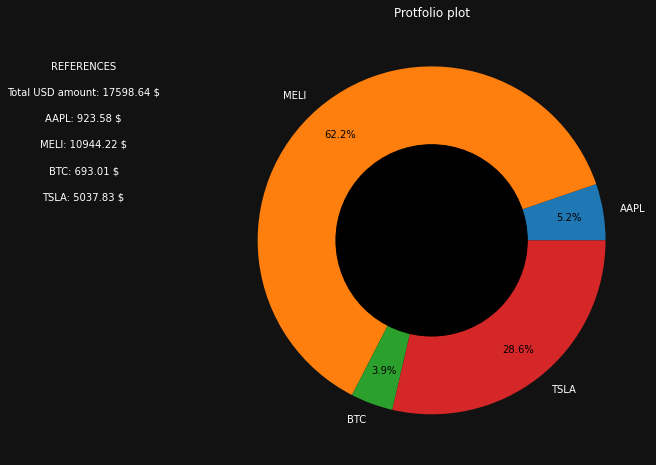

In [7]:
fig, ax = plt.subplots(figsize = (16,8))
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis = 'x', color = 'white')
ax.tick_params(axis = 'y', color = 'white')
ax.set_title("Protfolio plot", color = 'white')

_, texts, _ = ax.pie(total, labels = tickers, autopct = '%1.1f%%', pctdistance = 0.8)
[text.set_color('white') for text in texts]

circle = plt.Circle((0,0), 0.55, color = 'black')
plt.gca().add_artist(circle) # this adds a black circle to the pie chart and it looks like a donut

#add some references
ax.text(-2, 1, "REFERENCES", color = 'white', verticalalignment = 'center', horizontalalignment = 'center')
ax.text(-2, 0.85, f'Total USD amount: {sum(total):.2f} $', color = 'white', verticalalignment = 'center', horizontalalignment = 'center')

space_substract = 0.15

for ticker in tickers :
    ax.text(-2, 0.85 - space_substract, f'{ticker}: {total[tickers.index(ticker)]:.2f} $', color = 'white', verticalalignment = 'center', horizontalalignment = 'center')
    space_substract += 0.15

plt.show()